# Homework 2

## Pair Programming Group Number: 33
## Members of Team: Sean Mason, Matias Fragoso

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

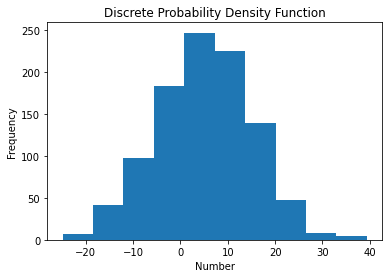

In [2]:
x = np.random.normal(5, 10, 1000)
plt.hist(x)
plt.title('Discrete Probability Density Function')
plt.ylabel('Frequency')
plt.xlabel('Number')
plt.show()

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  If can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

Text(0.5, 0, 'Number')

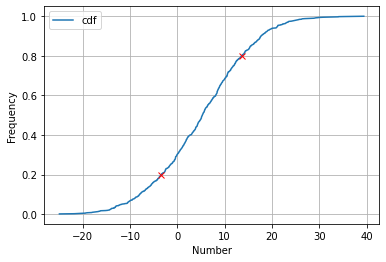

In [3]:
x= pd.Series(x, name = 'value')
df = pd.DataFrame(x)
df['cdf'] = df.rank(method = 'average', pct = True)
df.sort_values('value').plot(x = 'value', y = 'cdf', grid = True )       


for i in range(len(df.cdf)): 
    if .2 == df.cdf[i]: 
        idx2 = i
    if .8 == df.cdf[i]:
        idx8 = i
percent2 = df.iloc[idx2]
percent8 = df.iloc[idx8]

plt.plot(percent2.value,.2,'xr')
plt.plot(percent8.value,.8,'xr')
plt.ylabel('Frequency')
plt.xlabel('Number')

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

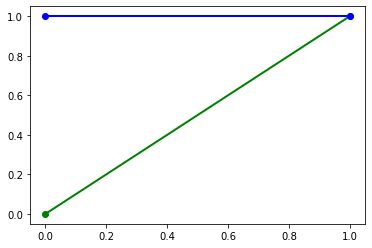

In [4]:
a = np.array([[0,1], [0,1]])
B = np.array([[1,0], [1,1]])
plt.plot(a[0], a[1], 'go-', label='line 1', linewidth=2)
plt.plot(B[0], B[1], 'bo-', label='line 2', linewidth=2)

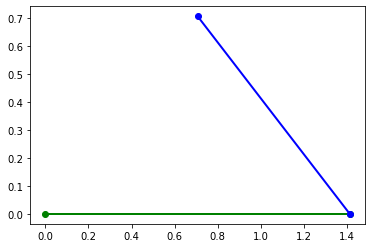

In [5]:
theta = np.pi/4 *(-1) # Clockwise 45 degree rotation
R = np.array([[np.cos(theta),np.sin(theta)*(-1)], [np.sin(theta),np.cos(theta)]])
a2 = np.matmul(R,a)
B2 = np.matmul(R,B)
plt.plot(a2[0], a2[1], 'go-', label='line 1', linewidth=2)
plt.plot(B2[0], B2[1], 'bo-', label='line 2', linewidth=2)

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [6]:
A = np.array([[2, 1,1], [4, -6,0],[-2,7,2]])
Ainv = inv(A) 
b = np.array([[5],[-2],[9]])
xyz = Ainv.dot(b)
xyz
# from thsi x = 1, y = 1, z = 2

array([[1.],
       [1.],
       [2.]])